## IMPORT LIBRARIES

In [1]:
import cv2
import os
import numpy as np
import time
import math
import apriltag
import pyrealsense2 as rs
from realworld_func.class_motionhelper import tracker, timer
from utils_real import *
from utils_track import tps_trans, get_tps_mat
from optical_flow import *
from run_snapbot_tps_opticalflow import *

print ("PACKAGES LOADED.")

PACKAGES LOADED.


## INSTANTIATE SNAPBOT

In [10]:
snapbot = xm430('SNAPBOT', USB_NUM=0)
snapbot.connect()
snapbot.IDX_LIST = [15,16,17,18,19,20,21,22]
snapbot.set_delaytime([30])
snapbot.set_pidgains(20, 0, 0)
snapbot.set_maxtorque([2000])
snapbot.set_goalspeed([1500])
snapbot.set_torque([1])

[SNAPBOT] INSTANTIATED AT [b'/dev/ttyUSB0']
[SNAPBOT] CONNECT
[PortHandler setup] The port number 0 has same device name... reinitialize port number 0!!
 SUCCEEDED TO OPEN THE PORT!
 SUCCEEDED TO CHANGE THE BAUDRATE!
COMMUNICATION SUCCESS
[SNAPBOT] DETECT ID
[SNAPBOT] [8]MOTORS DETECTED 
[SNAPBOT] ID_LIST:[[15, 16, 17, 18, 19, 20, 21, 22]]


## INITIALIZATION

In [11]:
snapbot.set_goalpos([2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048])
print (snapbot.get_currpos())
print ("INITIALIZE POSITION")

[2209 1694 2029 1690 2020 1677 2071 1627]
INITIALIZE POSITION


## JOINT TRAJECTORY

In [4]:
poses = np.load('qpos_dlpg/qpos_dlpg_17.npy')
run_snapbot(poses,snapbot,50,100)

TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [100.0sec].
FINISHED


## TPS

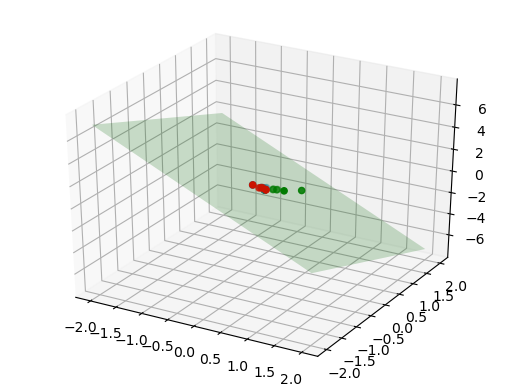

[[ 9.3564277e-06  5.3035365e-06]
 [ 1.7016968e-06 -2.1323119e-06]
 [-9.6805998e-06 -3.0825342e-06]
 [ 2.4513727e-06  1.1864671e-06]
 [-1.5723872e-05 -8.3737414e-06]
 [ 1.1843413e-05  7.9053380e-06]
 [-7.4271743e-06 -4.6919063e-06]
 [ 3.9942638e-06  2.1887993e-06]
 [ 9.3446533e-06  7.8236008e-06]
 [-1.2521921e-05 -9.2217315e-06]
 [ 1.0475956e-05  5.8623355e-06]
 [-4.1586395e-06 -2.3466582e-06]
 [-2.3583520e-06 -2.5971883e-06]
 [-1.3769070e-06 -1.9209995e-06]
 [ 5.4826864e-06  6.1828914e-06]
 [-1.4030024e-06 -2.0858979e-06]
 [-2.4630895e-02  1.4867149e-01]
 [-9.7184943e-04 -5.9673347e-04]
 [-1.1170590e-03 -5.8523851e-04]]


In [2]:
tps_coef = get_tps_mat()
print(tps_coef)

In [3]:
publish_xy(tps_coef, 20, 20, VERBOSE = True)

TIMER WITH [20]HZ INITIALIZED. MAX_SEC IS [20.0sec].
[INFO] [1664956913.320616]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.370751]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.420728]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.470755]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.520701]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.570778]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.620737]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.670760]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.720758]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.770767]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.820816]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.870775]: [0.025715216958026588, -0.06103842002460347]
[INFO] [1664956913.920754]: [0.025715216958026588, -0.06103842002460347

In [13]:
qpos = np.load('qpos_dlpg/qpos_dlpg_17.npy')
run_snapbot_tps(qpos, tps_coef, snapbot, 50, 5, VERBOSE=False, ROS_publish = True)

NameError: name 'snapbot' is not defined

## 

## OPTICAL FLOW

In [13]:
snapbot_cam_idx = find_snapbotcamidx()
print(snapbot_cam_idx)

optical_flow(snapbot_cam_idx[-1])

[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video3): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video5): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video6): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video7): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video8): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video9): can't open camera by index


[0, 2, 4]
212.6836207243681


## JOINT TRAJECTORY + TPS + OPTICAL FLOW

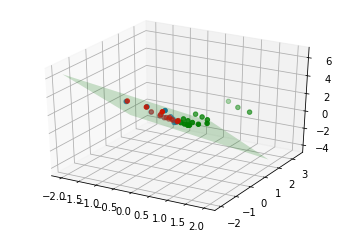

[[-3.9174911e-06  2.4857913e-05]
 [-4.4707353e-06 -1.3103939e-05]
 [ 3.7553011e-05  6.6076769e-05]
 [-2.0706080e-05 -4.8700156e-05]
 [-8.2339272e-07 -3.0592753e-05]
 [-6.7017427e-06 -1.3444553e-05]
 [-1.1239828e-05 -2.0673731e-05]
 [ 4.5513525e-06  1.6390313e-05]
 [ 9.5476730e-07  3.1684206e-06]
 [ 1.0854399e-06  7.4546338e-06]
 [ 3.9132265e-06  4.7143881e-06]
 [-2.9023199e-06 -6.0877442e-06]
 [ 1.4349265e-06 -1.1786016e-06]
 [-3.4957554e-07  2.7700992e-06]
 [-2.2996101e-06 -6.2348386e-06]
 [ 3.9180536e-06  1.4583784e-05]
 [ 1.1727651e+00  3.0176995e+00]
 [ 7.1866368e-04 -5.2523720e-03]
 [-1.1221399e-03 -5.5858544e-03]]


[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video3): can't open camera by index


[0, 2, 4]


[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video5): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video6): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video7): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video8): can't open camera by index
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video9): can't open camera by index


In [12]:
qpos = np.load('qpos_dlpg/qpos_dlpg_17.npy')

tps_coef = get_tps_mat()
print(tps_coef)

snapbot_cam_idx = find_snapbotcamidx()
print(snapbot_cam_idx)

In [18]:
run_snapbot_tps_opticalflow(qpos, tps_coef, snapbot, 50, 50, snapbot_cam_idx[-1], VERBOSE=True)

TIMER WITH [50]HZ INITIALIZED. MAX_SEC IS [50.0sec].
sec_elps_diff:[324.9ms]
[2][0.3s] DELAYED! T:[20.0ms] BUT IT TOOK [324.9ms]
sec_elps_diff:[73.8ms]
[3][0.4s] DELAYED! T:[20.0ms] BUT IT TOOK [73.8ms]
sec_elps_diff:[83.9ms]
[4][0.5s] DELAYED! T:[20.0ms] BUT IT TOOK [83.9ms]
sec_elps_diff:[89.3ms]
[5][0.6s] DELAYED! T:[20.0ms] BUT IT TOOK [89.3ms]
sec_elps_diff:[78.5ms]
[6][0.7s] DELAYED! T:[20.0ms] BUT IT TOOK [78.5ms]
sec_elps_diff:[81.3ms]
[7][0.7s] DELAYED! T:[20.0ms] BUT IT TOOK [81.3ms]
sec_elps_diff:[79.7ms]
[8][0.8s] DELAYED! T:[20.0ms] BUT IT TOOK [79.7ms]
sec_elps_diff:[74.7ms]
[9][0.9s] DELAYED! T:[20.0ms] BUT IT TOOK [74.7ms]
sec_elps_diff:[72.5ms]
[10][1.0s] DELAYED! T:[20.0ms] BUT IT TOOK [72.5ms]
sec_elps_diff:[74.7ms]
[11][1.0s] DELAYED! T:[20.0ms] BUT IT TOOK [74.7ms]
sec_elps_diff:[102.9ms]
[12][1.1s] DELAYED! T:[20.0ms] BUT IT TOOK [102.9ms]
sec_elps_diff:[73.5ms]
[13][1.2s] DELAYED! T:[20.0ms] BUT IT TOOK [73.5ms]
sec_elps_diff:[73.1ms]
[14][1.3s] DELAYED! T:[20.0m

## CLOSE SNAPBOT

In [19]:
snapbot.set_torque([0])
snapbot.close()

[SNAPBOT] CLOSE
